In [20]:
import sys
import os
import math
import time
import numpy as np
from PIL import Image
import cv2
import pynq
import scipy.misc
from IPython.display import display

In [21]:
overlay = pynq.Overlay('KingNet.bit')
dma = overlay.axi_dma_0
xlnk = pynq.Xlnk()
nn_ctrl = overlay.king_net_0

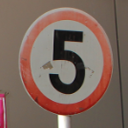

In [24]:
boat_im = cv2.imread('images/000_1.png', cv2.IMREAD_COLOR)
boat_im_rgb = cv2.cvtColor(boat_im, cv2.COLOR_BGR2RGB)
display(scipy.misc.toimage( boat_im_rgb ))
im_list = [boat_im]

In [25]:
height = 128
width = 128
pixel_bits = 24
in_buffer = xlnk.cma_array(shape=(128*16*3,8), dtype=np.uint8)    
out_buffer = xlnk.cma_array(shape=(5,2), dtype=np.int32)   

In [26]:
def net(in_buffer, out_buffer):
    nn_ctrl.write(0x0, 0) # Reset
    nn_ctrl.write(0x10, 1)#reps
    nn_ctrl.write(0x0, 1) # Deassert reset
    dma.recvchannel.transfer(out_buffer)
    dma.sendchannel.transfer(in_buffer)      
    dma.sendchannel.wait()
    dma.recvchannel.wait()

In [27]:
image = cv2.resize(im_list[0], (height, width)) 
#将原始图像转化为模板要求输入128*128
in_buffer[:] = np.reshape(image,(6144,8))

In [28]:
start = time.time()
net(in_buffer,out_buffer)
end = time.time()
total_time = end - start

In [29]:
result = out_buffer.reshape(10)
result = result.tolist()
max_index = result.index(max(result))
print(max_index)

0


In [30]:
print("Total time:", total_time, "seconds")
print('fps: {} .'.format(1 / total_time))

Total time: 0.0031528472900390625 seconds
fps: 317.1736237144586 .
